# Capstone Project 2 - Fake News Detection

## Introduction

We live in a post-truth world, where misinformation seems to increase all the time. We need a way to identify misinformation, apart from exhaustive, deep research on everything we read. Besides a few heuristics, can we go deeper with statistics and machine learning? This analysis shows that we can.

## Preprocessing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

#getnews and datascience are custom python modules to avoid cluttering the notebook with source code
import getnews as news
import datascience as data

from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
warnings.simplefilter(action='ignore', category=FutureWarning)


dir_pol_real = '/Users/carlosbrown/Documents/Springboard/Capstone Project 2/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/real/'
dir_pol_fake = '/Users/carlosbrown/Documents/Springboard/Capstone Project 2/FakeNewsNet-master/code/fakenewsnet_dataset/politifact/fake/'
dir_gos_real = '/Users/carlosbrown/Documents/Springboard/Capstone Project 2/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/real/'
dir_gos_fake = '/Users/carlosbrown/Documents/Springboard/Capstone Project 2/FakeNewsNet-master/code/fakenewsnet_dataset/gossipcop/fake/'
directory_list = [dir_pol_real,dir_pol_fake,dir_gos_real,dir_gos_fake]

## Get Data

In [2]:
df_pol_real = news.getnews(dir_pol_real)
df_pol_real.head()

,title,text,authors,num_images,domain,url
0,Local News Headlines Hawaii,If you want to do business with Miller Industr...,['Dan Nakaso Dnakaso Staradvertiser.Com On Apr...,19,starbulletin,http://www.starbulletin.com/news/bulletin/9467...
1,Change We Can Believe In,Remarks of Senator Barack Obama: Apostolic Chu...,[],33,archive,https://web.archive.org/web/20080618171108/htt...
2,One in Four,One in Four\n\nCongressman Joe Pitts Blocked U...,['Congressman Joe Pitts'],4,medium,https://medium.com/@RepJoePitts/one-in-four-66...
3,,,[],0,politico,http://www.politico.com/news/stories/0309/2034...
4,,,[],0,fec,http://docquery.fec.gov/pdf/613/20180415910815...


In [3]:
df_pol_fake = news.getnews(dir_pol_fake)
df_pol_fake.head()

,title,text,authors,num_images,domain,url
0,Cannibals Arrested in Florida Claim Eating Hum...,"Police in Vernal Heights, Florida, arrested 3-...",['Daily Buzz Live'],17,dailybuzzlive,dailybuzzlive.com/cannibals-arrested-florida/
1,BREAKING: Trump fires Deputy Attorney General ...,"WASHINGTON — Rod Jay Rosenstein, Deputy Attorn...",[],23,archive,https://web.archive.org/web/20171228192703/htt...
2,Keanu Reeves Shook The World With Another POWE...,Sign up for your daily dose of enlightenment a...,['Higher Perspective'],5,higherperspectives,www.higherperspectives.com/powerful-note-16453...
3,Eveningw.com,,[],0,eveningw,http://eveningw.com/breaking-woman-says-offere...
4,"First family visits D.C. shelter, highlights h...","\n\nPresident Obama, alongside his family, ser...","['Juliet Eilperin', 'Reporter Covering Domesti...",4,washingtonpost,https://www.washingtonpost.com/news/post-polit...


In [4]:
df_pol_fake.shape

(328, 6)

In [5]:
df_gos_real = news.getnews(dir_gos_real)
df_gos_real.head()

,title,text,authors,num_images,domain,url
0,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,When you get married on national TV (and who i...,[],7,brides,https://www.brides.com/story/teen-mom-jenelle-...
1,Kylie Jenner refusing to discuss Tyga on Life ...,Kylie Jenner reportedly doesn't want to talk a...,['Ross Mcdonagh For Dailymail.Com'],455,dailymail,https://www.dailymail.co.uk/tvshowbiz/article-...
2,Quinn Perkins,Character on American television series Scanda...,[],6,wikipedia,https://en.wikipedia.org/wiki/Quinn_Perkins
3,I Tried Kim Kardashian's Butt Workout & Am For...,Health Trends\n\nCanicross Is A New Fitness Tr...,"['Elizabeth Buxton', 'Megan Decker', 'Cory Sti...",6,refinery29,https://www.refinery29.com/en-us/2018/03/19192...
4,Celine Dion donates concert proceeds to Vegas ...,(CNN) An emotional Celine Dion returned to the...,['Sandra Gonzalez'],5,cnn,https://www.cnn.com/2017/10/04/entertainment/c...


In [6]:
df_gos_real.shape

(16190, 6)

In [7]:
df_gos_fake = news.getnews(dir_gos_fake)
df_gos_fake.head()

,title,text,authors,num_images,domain,url
0,Did Miley Cyrus and Liam Hemsworth secretly ge...,Congratulations might be in order for Miley Cy...,['Caitlyn Hitt'],453,dailymail,www.dailymail.co.uk/tvshowbiz/article-5874213/...
1,Paris Jackson & Cara Delevingne Enjoy Night Ou...,Paris Jackson and Cara Delevingne were spotted...,"['Courteney Larocca', 'Weekend Editor']",17,hollywoodlife,hollywoodlife.com/2018/05/05/paris-jackson-car...
2,Celebrities Join Tax March in Protest of Donal...,Thousands are taking the streets to protest Pr...,"['Variety Staff', 'Follow Us On Twitter', ""Var...",36,variety,variety.com/2017/biz/news/tax-march-donald-tru...
3,Cindy Crawford's daughter Kaia Gerber wears a ...,We'd venture to say that Cindy Crawford's daug...,"['Carly Stern For Dailymail.Com', 'Jj Nattrass...",416,dailymail,www.dailymail.co.uk/femail/article-3499192/Do-...
4,Full List of 2018 Oscar Nominations – Variety,Follow Us on Twitter\n\nOscar nominations for ...,"['Variety Staff', 'Follow Us On Twitter', ""Var...",35,variety,variety.com/2018/film/news/list-2018-oscar-nom...


In [8]:
df_gos_fake.shape

(4899, 6)

## Clean Data

In [9]:
#remove rows that have no text in the text column
df_pol_real = news.cleandf(df=df_pol_real,col='text',exclude='')
df_pol_fake = news.cleandf(df=df_pol_fake,col='text',exclude='')
df_gos_real = news.cleandf(df=df_gos_real,col='text',exclude='')
df_gos_fake = news.cleandf(df=df_gos_fake,col='text',exclude='')

df_list = [df_pol_real,df_pol_fake,df_gos_real,df_gos_fake]

#Add response variable 'class' based on True=1 or Fake=0
df_pol_real['class'] = 1 #True
df_pol_fake['class'] = 0 #Fake
df_gos_real['class'] = 1
df_gos_fake['class'] = 0

#combine df's into one
df = pd.concat(df_list).reset_index(drop=True)
tot_articles = df.shape[0]

In [10]:
df.head()

,title,text,authors,num_images,domain,url,class
0,Local News Headlines Hawaii,If you want to do business with Miller Industr...,['Dan Nakaso Dnakaso Staradvertiser.Com On Apr...,19,starbulletin,http://www.starbulletin.com/news/bulletin/9467...,1
1,Change We Can Believe In,Remarks of Senator Barack Obama: Apostolic Chu...,[],33,archive,https://web.archive.org/web/20080618171108/htt...,1
2,One in Four,One in Four\n\nCongressman Joe Pitts Blocked U...,['Congressman Joe Pitts'],4,medium,https://medium.com/@RepJoePitts/one-in-four-66...,1
3,Pastors To Protest IRS Rules on Political Advo...,"On Sept. 28, pastors from 20 states will give ...",[],4,pewforum,http://www.pewforum.org/2008/09/19/pastors-to-...,1
4,“Dictionary” on President Obama’s Health Care ...,WASHINGTON – The Republican National Committee...,"['Written On September', 'Republican National ...",32,archive,https://web.archive.org/web/20091003005639/htt...,1


In [11]:
df['authors'].unique().shape

(5558,)

In [12]:
df['class'].value_counts() / df.shape[0]*100

1    76.544294
0    23.455706
Name: class, dtype: float64

## EDA

### Word Counts

Find the top 15 words by dataset/real or fake

In [13]:
words = []
for item in df_list:
    words.append(list(data.cleanwordcounts(item.text).word.head(15)))

In [14]:
df_words = pd.DataFrame(words).T
df_words.columns = ['Politifact-Real','Politifact-Fake','Gossipcop-Real','Gossipcop-Fake']
df_words

,Politifact-Real,Politifact-Fake,Gossipcop-Real,Gossipcop-Fake
0,people,trump,one,said
1,going,said,said,one
2,think,president,like,time
3,president,people,new,new
4,would,one,time,like
5,know,would,also,year
6,said,also,first,also
7,0,news,show,first
8,one,new,year,source
9,1,us,season,would


There is a lot of crossover between real and fake in terms of top words, comparing between both politifact and gossipcop. It appears that there is a lot of fake news dealing with President Trump. Could this indicate a bias in the media directed at Trump? This question is beyond the scope of this analysis, but is good food for thought.

### Domains

In [15]:
#top 15 news publishers
domains = pd.DataFrame(df['domain'].value_counts())
domains.columns = ['count']
domains.head(15)

,count
people,1783
dailymail,964
wikipedia,739
usmagazine,709
etonline,656
longroom,556
hollywoodlife,524
usatoday,344
hollywoodreporter,329
variety,304


Text(0.5, 1.0, 'Domains - Count')

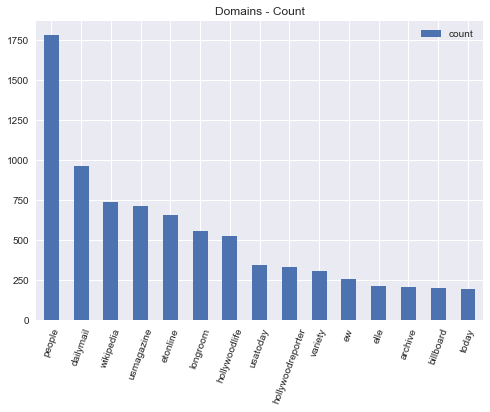

In [16]:
plt.style.use('seaborn')
domains.head(15).plot(kind='bar')
plt.xticks(rotation=70)
plt.title('Domains - Count')

In [17]:
#what domains are common between the two datasets?
polset = set(df_pol_real.domain.unique()).union(set(df_pol_fake.domain.unique()))
gosset = set(df_gos_real.domain.unique()).union(set(df_gos_fake.domain.unique()))
intersect = polset.intersection(gosset)
print(intersect)

{'huffingtonpost', 'usatoday', 'me', 'independent', 'go', 'cnn', 'wordpress', 'yournewswire', 'desmoinesregister', 'boingboing', 'hollywoodreporter', 'pix11', 'firstpost', 'inverse', 'trendolizer', 'businessinsider', 'realclearpolitics', 'nypost', 'breitbart', 'radaronline', 'thesun', 'unilad', 'mirror', 'wsj', 'bloomberg', 'usnews', 'tampabay', 'theverge', 'theguardian', 'reuters', 'washingtonpost', 'medium', 'boston', 'guardian', 'apnews', 'bbc', 'genius', 'thehill', 'vox', 'politico', 'nytimes', 'infowars', 'latimes', 'rare', 'npr', 'steemit', 'archive', 'msn', 'rollingstone', 'mtv', 'foxnews', 'time', 'nymag', 'aljazeera', 'reddit', 'cbslocal', 'nbcnews', 'chicagotribune', 'cbsnews', 'pbs'}


Many of the well known publishers show up both sets, however there are a few relatively unknown domains like boingboing and pixll that are in both.

### Number of Images

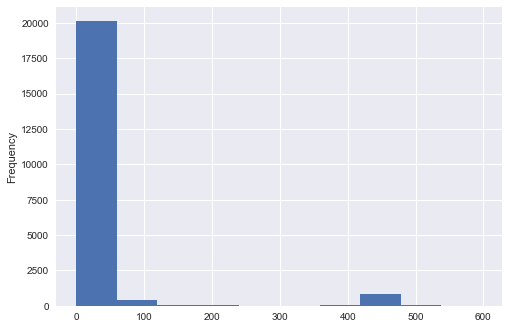

In [18]:
df.num_images.plot(kind='hist')
plt.savefig('./Images/images.png',format='png')

Most articles have less than 50 images, but there is a strange blip between 400 and 500.

In [19]:
df['num_images'].describe()

count    21628.000000
mean        34.610505
std         90.292931
min          0.000000
25%          6.000000
50%         11.000000
75%         22.000000
max        598.000000
Name: num_images, dtype: float64

Do fake news articles use more or less images than real news articles?

In [20]:
image_by_class = pd.pivot_table(df,index='class',aggfunc={'num_images':['mean','std']})
print(image_by_class)

      num_images           
            mean        std
class                      
0      31.761088  82.660956
1      35.483661  92.490461


It appears at first inspection that fake news articles use fewer images than real news articles overall. This makes sense as fake images take more effort to create as one must obtain original images and doctor them or generate them from scratch for fake news. They may also distract from the theme of the fake news text, which is the idea that the article is trying to get across. The image may be a distraction that could easily clue people in to the nature of the article

Let's run a permuation test to see if their is a statistical difference in the distributions. One sided statistical test
H0: The distributions of num_images between classes is the same
Ha: Real news articles have a different distribution of images than fake news articles

significance level = 1%

In [21]:
class1 = df[df['class']==1]['num_images']
class0 = df[df['class']==0]['num_images']
diff = image_by_class.iloc[1,0] - image_by_class.iloc[0,0]
#generate 50000 samples of the difference of means between the two classes
perm_sample = data.draw_perm_reps(class1,class0,func=data.diff_of_means,size=50000)
print("Observed difference in means:",round(diff,2))

Observed difference in means: 3.72


(array([1.5000e+01, 3.0000e+02, 2.0610e+03, 7.9060e+03, 1.5097e+04,
        1.5056e+04, 7.5150e+03, 1.8280e+03, 2.0900e+02, 1.3000e+01]),
 array([-6.11211588, -4.88082908, -3.64954228, -2.41825548, -1.18696868,
         0.04431813,  1.27560493,  2.50689173,  3.73817853,  4.96946533,
         6.20075214]),
 <a list of 10 Patch objects>)

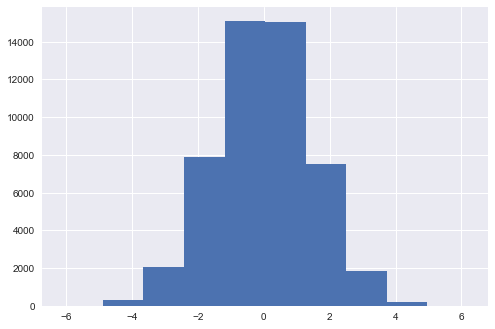

In [22]:
#histogram of the difference of means
plt.hist(perm_sample)

In [23]:
#calculate p-value
p_value = len(perm_sample[perm_sample >= diff]) / len(perm_sample)
p_value

0.0046

Our p-value is less than alpha value for a one-sided test. We reject the null in favor of the alternative hypothesis, there is a statistically significant difference in the number of images that the two types of news use.

In [24]:
#Real news confidence interval for mean number of images
data.conf_int(class1)

array([34.07089399, 36.91581848])

In [25]:
data.conf_int(class0)

array([29.46771141, 34.05283363])

### Worst Offenders and the Truth Tellers

Create a pivot table to visualize the counts of fake news and real news articles by domain, also compute a truthfulness ratio

In [26]:
#create df_sum dataframe to quantify the counts of true vs fake articles by domain, as well
#as the truthfulness of the site, given by %true column
df_sum = pd.pivot_table(df,index='domain',columns='class',fill_value=0,aggfunc={'domain':'count'})
df_sum['%true'] = df_sum.apply(lambda row: row[1]/(row[0]+row[1]),axis=1)
df_sum[(df_sum['%true']!=1)&(df_sum['%true']!=0)].sort_values(by='%true')

domain          %true
class                   0    1          
domain                                  
newidea               134    6  0.042857
radaronline           174   19  0.098446
hollywoodlife         460   64  0.122137
yourtango              14    2  0.125000
femalefirst            14    2  0.125000
thehollywoodgossip     42    8  0.160000
theatlantic             5    1  0.166667
girlfriend             10    2  0.166667
dailystar              10    2  0.166667
intouchweekly          75   17  0.184783
lifeandstylemag        52   12  0.187500
journalpost             4    1  0.200000
enstarz                 4    1  0.200000
business-standard       3    1  0.250000
contactmusic            3    1  0.250000
thenational             3    1  0.250000
datalounge              3    1  0.250000
gobankingrates          3    1  0.250000
heavy                   5    2  0.285714
marriedbiography       15    6  0.285714
tribune                 5    2  0.285714
facebook                5    2  0.285714
aceshowbiz             24   10  0.294118
ibtimes                61   27  0.306818
okmagazine             63   29  0.315217
wonderwall             19    9  0.321429
inquisitr             107   51  0.322785
player                  2    1  0.333333
calgarysun              2    1  0.333333
entertainmentdaily      4    2  0.333333
...                   ...  ...       ...
her                     1   11  0.916667
allure                  3   35  0.921053
justjaredjr             1   12  0.923077
today                  15  180  0.923077
tennessean              1   12  0.923077
politifact              2   24  0.923077
glamour                 7   88  0.926316
bravotv                11  147  0.930380
blogspot                2   29  0.935484
tvguide                 2   29  0.935484
hola                    1   15  0.937500
reuters                 1   15  0.937500
essence                 1   16  0.941176
newslocker              1   17  0.944444
bbc                     4   70  0.945946
popculture              4   74  0.948718
hellogiggles            4   75  0.949367
tvinsider               1   20  0.952381
w3livenews              1   21  0.954545
kardashiantoday         1   23  0.958333
wikia                   1   25  0.961538
stylecaster             1   29  0.966667
indiewire               1   30  0.967742
upi                     2   67  0.971014
biphoo                  1   34  0.971429
medium                  3  103  0.971698
theworldnews            1   40  0.975610
youtube                 1   46  0.978723
scoopnest               1   49  0.980000
tvline                  1   71  0.986111

[378 rows x 3 columns]

Pulling up the rear, we can see hollywoodlife and yourtango as some of the worst sites for fake news. On the other end, we can see more reputable sites like youtube and bbc mostly publish true stories. It is interesting to note the domains that have a proclivity for fake news, but each article should be judged on its own merit, not dismissed because it comes from a site that publishes lots of fake news articles. This would be an example of the genetic fallacy, and we want to avoid that.

In [27]:
#what is the purity of the dataset?
round(df_sum[(df_sum['%true']==1)|(df_sum['%true']==0)].shape[0] / df_sum.shape[0],2)

0.79

### Word Cloud

Let's generate a couple of word clouds to get a visual idea of the most common words from the Politifact sample.

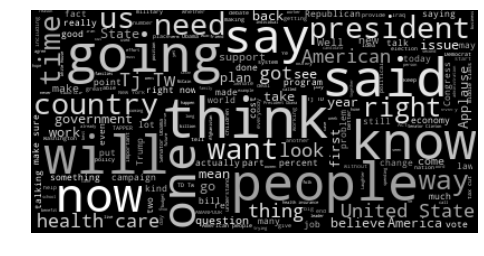

In [153]:
from wordcloud import WordCloud
import random
#build list of stop words
stop_words = stopwords.words('english')
#function to pass to color_func to change default wordcloud colors
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Generate a word cloud image for real news from Politifact sample
wordcloud = WordCloud(max_font_size=50).generate(text_pol_real)
plt.figure()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.savefig('./Images/realwordcloud.png',format='png')
plt.show()

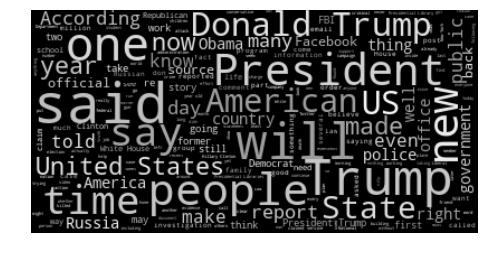

In [154]:
# Generate a word cloud image for Fake News from Politifact sample

wordcloud = WordCloud(max_font_size=50).generate(text_pol_fake)
plt.figure()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.savefig('./Images/fakewordcloud.png',format='png')
plt.show()

### Zipf's law

We want to run a statistical test to find whether our corpus roughly follows the famous Zipf's law. We also want to see if using Zipf's law will help in detecting fake news by comparing the distribution of word tokens in our documents vs what we would expect assuming a Zipf distribution.

Generate Zipf distribution using the following equation

\begin{equation*}
P(w) \propto \frac{1}{R(w)^{1.07}}
\end{equation*}

where

P(w) = probability of that word occuring in the dataset

R(w) = Ordered Rank of word in dataset

In [30]:
#generate word counts, real news
df_realcounts = data.wordcounts(df_pol_real.text)
df_realcounts.reset_index(drop=True,inplace=True)

#total word occurences
total = df_realcounts['counts'].sum()

In [31]:
#generate expected counts from zipf distribution
df_realcounts['zipf_counts'] = pd.Series(total/(np.array(range(len(df_realcounts)))+1)**1.07)

#scale zipf to empirical scale
scale_factor =  df_realcounts.counts[0] / df_realcounts.zipf_counts[0]
df_realcounts['zipf_counts'] = df_realcounts['zipf_counts'] * scale_factor

In [32]:
df_realcounts.head()

,word,counts,zipf_counts
0,the,52373,52373.000000
1,to,36021,24946.254936
2,and,31883,16165.446666
3,of,26180,11882.375180
4,that,25116,9358.571161


In [33]:
#create empirical cumulative distribution functions (ecdf)
emp_x_real, emp_y_real = data.ecdf(df_realcounts.counts.values)
zipf_x_real, zipf_y_real = data.ecdf(df_realcounts.zipf_counts.values)

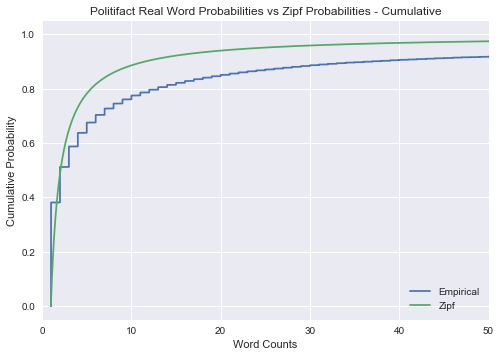

In [34]:
#visually compare distributions
plt.plot(emp_x_real, emp_y_real, label='Empirical')
plt.plot(zipf_x_real, zipf_y_real, label='Zipf')
plt.legend(loc='lower right')
plt.title('Politifact Real Word Probabilities vs Zipf Probabilities - Cumulative')
plt.xlabel('Word Counts')
plt.ylabel('Cumulative Probability')
plt.xlim([0,50])
plt.savefig('./Images/Zipf_real.png',format='png')

In [35]:
#genreate word counts, fake
df_fakecounts = data.wordcounts(df_pol_fake.text)
df_fakecounts.reset_index(drop=True,inplace=True)
total = df_fakecounts['counts'].sum()

In [36]:
#generate expected counts from zipf distribution
df_fakecounts['zipf_counts'] = pd.Series(total/(np.array(range(len(df_fakecounts)))+1)**1.07)
#scale zipf to empirical
scale_factor = df_fakecounts.counts[0] / df_fakecounts.zipf_counts[0]
df_fakecounts['zipf_counts'] = df_fakecounts['zipf_counts'] * scale_factor

In [37]:
df_fakecounts.head()

,word,counts,zipf_counts
0,the,6765,6765.000000
1,to,3413,3222.298028
2,of,2921,2088.084446
3,and,2812,1534.841771
4,a,2513,1208.842990


In [38]:
#generate ecdf's
emp_x_fake, emp_y_fake = data.ecdf(df_fakecounts.counts.values)
zipf_x_fake, zipf_y_fake = data.ecdf(df_fakecounts.zipf_counts.values)

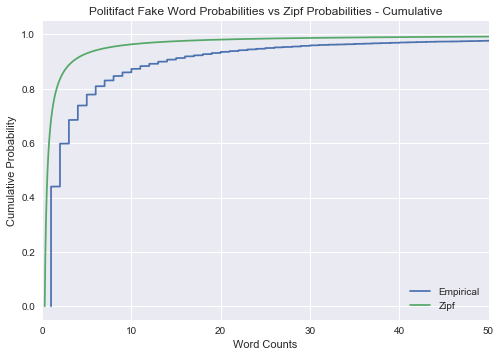

In [39]:
#visualize results
plt.plot(emp_x_fake, emp_y_fake, label='Empirical')
plt.plot(zipf_x_fake, zipf_y_fake, label='Zipf')
plt.legend(loc='lower right')
plt.title('Politifact Fake Word Probabilities vs Zipf Probabilities - Cumulative')
plt.xlabel('Word Counts')
plt.ylabel('Cumulative Probability')
plt.xlim([0,50])
plt.savefig('./Images/Zipf_fake.png',format='png')

(0, 50)

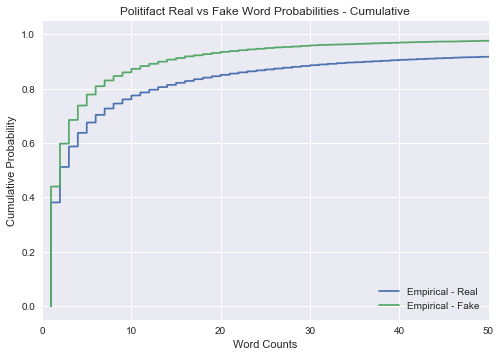

In [40]:
#visually compare empirical distributions to each other
plt.plot(emp_x_real, emp_y_real, label='Empirical - Real')
plt.plot(emp_x_fake, emp_y_fake, label='Empirical - Fake')
plt.legend(loc='lower right')
plt.title('Politifact Real vs Fake Word Probabilities - Cumulative')
plt.xlabel('Word Counts')
plt.ylabel('Cumulative Probability')
plt.xlim([0,50])

In [41]:
#use trapezoidal rule to evaluate the fit of the distributions 
#difference in area under the curve shows deviation from the Zipf, lower is better
real_fit = np.trapz(y=zipf_y_real,x=zipf_x_real) - np.trapz(y=emp_y_real,x=emp_x_real)
round(real_fit,2)

28.34

In [42]:
fake_fit = np.trapz(y=zipf_y_fake,x=zipf_x_fake) - np.trapz(y=emp_y_fake,x=emp_x_fake)
round(fake_fit,2)

5.85

Interestingly, both real and fake news from politifact track well with Zipf but not in any exact sense. Fake news appears to track Zipf closer than real, both by visual inspection and numerically from the trapezoidal rule. This is surprising since the expectation was to find that fake news does not follow the Zipf distribution since it is by definition, artificial use of language. Zipf's power law distribution may not be helpful in identifying real vs fake news. Let's give Machine Learning a try.

Now that we have explored our dataset using statistics and visualization, let's build our predictive models. We will use Naive Bayes with Bag of words as the benchmark for the BERT algorithm.

## Machine Learning

Real news is 1, Fake news is 0. This differs from the intuition of a positive (1) result as indicating that fake news has been found and is noted for clarity of interpretation.

### Preprocessing

In [43]:
#make vectorizer
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\w+', stop_words=stop_words, min_df=2)
#fit text
vectorizer.fit(df.text)
#transform to sparse array
fitted = vectorizer.transform(df.text)

### Multinomial Naive Bayes

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB

# Convert to dense numpy array
X = fitted.toarray()
#make response variables
y = df['class'].values
#split testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
#alpha values for manual grid search, slow evaluation
alpha_list = np.arange(1.5,1.9,0.1)
clf_scores = []
classifiers = []
for alpha in alpha_list:
    #instantiate naive bayes classifier
    clf = MultinomialNB(alpha=alpha)
    #fit data using vectorized words and compute cross validated score
    clf.fit(X_train,y_train)
    clf_score = np.mean(cross_val_score(clf,X_test,y_test,cv=5))
    #append score to list
    clf_scores.append(clf_score)
    classifiers.append(clf)

In [45]:
#max accuracy score
round(max(clf_scores),3)

0.836

In [46]:
#best alpha
round(list(alpha_list)[clf_scores.index(max(clf_scores))],2)

1.7

Confusion matrix, without normalization
[[2714  602]
 [ 279  731]]


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


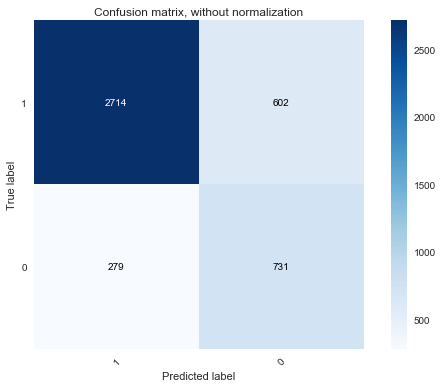

In [47]:
#plot confusion matrix for Multinomial Naive Bayes Classifier
clf = classifiers[clf_scores.index(max(clf_scores))]
y_pred = clf.predict(X_test)
data.plot_confusion_matrix(y_test,y_pred,[1,0],normalize=False)

In [163]:
#calculate model metrics
from sklearn.metrics import precision_recall_fscore_support, auc, roc_curve
bayes_metrics = precision_recall_fscore_support(y_test,y_pred,average='weighted')

print('Weighted Precision: {0:.2f}%'.format(bayes_metrics[0]*100))
print('Weighted Recall: {0:.2f}%'.format(bayes_metrics[1]*100))
print('Weighted F-Score: {0:.2f}%'.format(bayes_metrics[2]*100))

Weighted Precision: 82.31%
Weighted Recall: 79.63%
Weighted F-Score: 80.52%


### Google BERT

Google BERT is a state of the art deep learning model. More specifically, BERT stands for Bidirectional Encoder Representations from Transformer. From the BERT home page...

"BERT is a method of pre-training language representations, meaning that we train a general-purpose "language understanding" model on a large text corpus (like Wikipedia), and then use that model for downstream NLP tasks that we care about"

BERT fine tunes by training an additional output layer on the pre-trained neural network. Combined with the context sensitivity of the neural network, BERT provides a powerful framework for our fake news classification task. We will now take the pre-trained models, both the Base and the Large model, and fine tune it for fake news classification. This "fine tuning" does not entail hyper-parameter fine tuning.

#### Data Preparation

The BERT algorithm expects data in a very specific format within a .tsv file. We will clean up the data further and aggregate into the desired input format.

In [49]:
df_bert = pd.DataFrame({'id':df.index,'label':df['class'],'alpha':'a','text':df.text})
df_bert.text = df_bert.apply(lambda row: row.text.lower(), axis=1)
df_bert.head()

,id,label,alpha,text
0,0,1,a,if you want to do business with miller industr...
1,1,1,a,remarks of senator barack obama: apostolic chu...
2,2,1,a,one in four\n\ncongressman joe pitts blocked u...
3,3,1,a,"on sept. 28, pastors from 20 states will give ..."
4,4,1,a,washington – the republican national committee...


In [72]:
#Remove new line characters as BERT does not accept these
df_bert.text = df_bert.text.apply(lambda t: t.replace('\n',' '))

In [73]:
#Split into train, dev sets
df_bert_train, df_bert_dev = train_test_split(df_bert,test_size=0.1,random_state=42)

Initially, an 80%/20% train test split was used, but this degraded model performance below what was obtained using Naive Bayes. We have used a 90%/10% split for the final iteration, which has led to increased in accuracy.

In [74]:
#Split dev into dev and test. dev will be used to internally validate the model using the eval=true setting
limit = 100
df_bert_test = df_bert_dev[:limit]
df_bert_dev = df_bert_dev[limit:]

In [75]:
df_bert_test_ready = df_bert_test.drop(columns=['label','alpha']).reset_index(drop=True)
df_bert_test_ready.head()

,id,text
0,14498,"ratings declined this season, as the show shif..."
1,17916,i apologize to people magazine for calling the...
2,5244,kim kardashian west is without her longtime ri...
3,21458,talk about making lemonade from lemons. ariana...
4,13064,her emmy-winning show this is us has been rene...


In [54]:
#save to .tsv and upload data files to the cloud
df_bert_train.to_csv('/Users/carlosbrown/Documents/Springboard/Capstone Project 2/bert/data/train.tsv',sep='\t',index=False,header=False)
df_bert_dev.to_csv('/Users/carlosbrown/Documents/Springboard/Capstone Project 2/bert/data/dev.tsv',sep='\t',index=False,header=False)
df_bert_test.to_csv('/Users/carlosbrown/Documents/Springboard/Capstone Project 2/bert/data/test.tsv',sep='\t',index=False,header=True)

Originally, we ran BERT on the local machine i5 CPU, but after a day the model was STILL running. We decided to take advantage of the Google TPU's available on Google's Cloud Platform, which are significantly faster than both CPU and GPU for training Deep Learning models. The following steps were taken to run the fine tuning model on the cloud.

**BERT Setup Steps**
1. Create a Cloud account
2. Create a data bucket, which acts as the repository for all input and output files for the model
3. Upload our train.tsv, dev.tsv, and test.tsv to the cloud bucket
3. Initialize the TPU using the Cloud Shell
4. Clone the BERT repository into the cloud virtual machine
5. Set working directories for both the pre-trained model used for fine-tuning and the output folder in our data bucket.
6. Initiate run_classifier.py with the desired parameters.
7. Evaluate results

In [55]:
# The following inputs were used to initialize the fine tuning process within the cloud shell

# export BERT_BASE_DIR = gs://bert_models/2018_10_18/uncased_L-12_H-768_A-12
# export STORAGE_BUCKET = gs://data_bucket_name
    
# python run_classifier.py \
# --task_name=cola \
# --use_tpu=true \
# --tpu_name=TPU_NAME \
# --do_train=true \
# --do_eval=true \
# --data_dir=${STORAGE_BUCKET}/data \
# --vocab_file=$BERT_BASE_DIR/vocab.txt \
# --bert_config_file=$BERT_BASE_DIR/bert_config.json \
# --max_seq_length=128 \
# --learning_rate=2e-5 \
# --num_train_epochs=3.0 \
# --output_dir=${STORAGE_BUCKET}/bert_output

#### BERT Evaluation Results

The following results were obtained using the BERT Base 12-layer, 768-hidden, 12-heads, 110M parameters, uncased model. Total run time was under 10 minutes.

**BERT Base**

eval_accuracy = 86.8%

The following results were obtained using the BERT Large 24-layer, 1024-hidden, 16-heads, 340M parameters uncased model

**BERT Large**

eval_accuracy = 85.5%

Strangely, the **Base** model outperformed the **Large**, 24 layer model slightly, after several runs. At first, Google's documentation notes that there can be large variance in model results run by run, however this didn't happen for the fake news classification problem. Fine tuning the hyper parameters to max out model performance and possibly exceed Base model performance, is a next step for this analysis.

So, the **biggest** factor in model performance in the size of the training set. While fine tuning hyper-parameters can yield better results, we saw the most significant change in performance when we simply increased the amount of training data.

Overall, we have obtained great results using BERT to fine tune on our fake news dataset. The additional overhead for BERT for an additional 3% accuracy over Naive Bayes may not be worth it if we wanted to take these models to production, however it depends on the application.

#### BERT Test Results

The tuned BERT model was tested against unseen data, found in test.tsv. The model directly outputs class probabilities, ie the chance that the observation is from that particular class. We will import the probabilities and calculate **metrics of interest**, similar to our Naive Bayes run.

In [113]:
#import test results, same order as test.tsv
test_results = pd.read_csv('/Users/carlosbrown/Documents/Springboard/Capstone Project 2/bert/bert_output/bert_output_test_test_results.tsv',sep='\t',header=None)
test_results.head()

,0,1
0,0.005095,0.994905
1,0.008401,0.991599
2,0.906313,0.093687
3,0.071353,0.928647
4,0.004689,0.995311


In [114]:
#reset indices
df_bert_test.reset_index(drop=True,inplace=True)
df_bert_test.head()

,id,label,alpha,text
0,14498,1,a,"ratings declined this season, as the show shif..."
1,17916,0,a,i apologize to people magazine for calling the...
2,5244,1,a,kim kardashian west is without her longtime ri...
3,21458,0,a,talk about making lemonade from lemons. ariana...
4,13064,1,a,her emmy-winning show this is us has been rene...


In [148]:
#concatenate original df_bert_test with bert output results
df_test = pd.concat([df_bert_test,test_results],axis=1)
df_test.columns = ['id','label','alpha','text','fake','real']
df_test['predict'] = 0

In [149]:
#convert probabilities to class prediction
def predict(row):
    if row['fake'] > row['real']:
        return 0
    else:
        return 1
    
df_test['predict'] = df_test.apply(lambda row: predict(row),axis=1)
df_test.head()

,id,label,alpha,text,fake,real,predict
0,14498,1,a,"ratings declined this season, as the show shif...",0.005095,0.994905,1
1,17916,0,a,i apologize to people magazine for calling the...,0.008401,0.991599,1
2,5244,1,a,kim kardashian west is without her longtime ri...,0.906313,0.093687,0
3,21458,0,a,talk about making lemonade from lemons. ariana...,0.071353,0.928647,1
4,13064,1,a,her emmy-winning show this is us has been rene...,0.004689,0.995311,1


In [161]:
#calculate and print BERT model metrics
test_accuracy = df_test[df_test['label']==df_test['predict']].shape[0] / df_test.shape[0]
bert_metrics = precision_recall_fscore_support(df_test['label'],df_test['predict'],average='weighted')

print('Weighted Precision: {0:.2f}%'.format(bert_metrics[0]*100))
print('Weighted Recall: {0:.2f}%'.format(bert_metrics[1]*100))
print('Weighted F-Score: {0:.2f}%'.format(bert_metrics[2]*100))

Weighted Precision: 83.24%
Weighted Recall: 84.00%
Weighted F-Score: 83.22%


All metrics have significantly improved over the Naive Bayes model

Confusion matrix, without normalization
[[70  5]
 [11 14]]


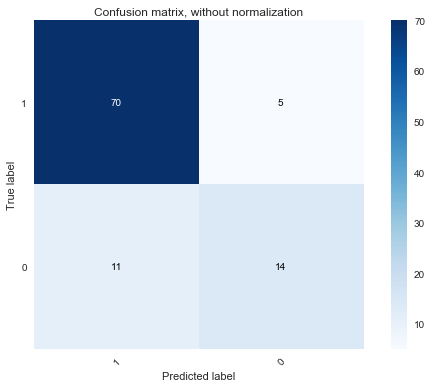

In [135]:
#generate confusion matrix
data.plot_confusion_matrix(df_test['label'],df_test['predict'],[1,0],normalize=False)

**A brief word on the consequences of mislabeling news as fake or real.** A real news story is labeled fake vs a fake news story is labeled as real, which is worse? It depends on the context. On one hand, the reputation of a publisher could take a big hit if its stories get labeled as fake when they are real. This could affect their revenue in the long run, and this would be classified as a false negative under the current scheme. On the other hand, a story labeled as real when it is indeed fake, would not do any immediate damage to the publisher, though it could do damage down the road if the truth eventually came out. It would actually harm the public more than the publisher, because they are believing/acting on information that is not true and could cause harm. This would be a false positive under the current scheme. It is thinking the article is real (1) when it is fake (0). Again this is very context sensitive (harm of thinking the Kardashians are going to Paris when they are not vs harm of thinking it's safe to go to the beach when a tsunami is about to hit), the model with the highest precision would be of the best benefit to the public, all else being equal. 

## Conclusion

This analysis has accomplished two main goals

1. Use EDA to explore a large sample of real and fake news
2. Build accurate predictive models to classify news as real or fake

After all machine learning analysis is complete, we see that Google BERT has produced superior results to Multinomial Naive Bayes by 3%. Both techniques have been successful in classifying news correctly from 83% to 86% of the time. In a production environment, it would be preferrable to use the Naive Bayes approach, due to its lower overhead compared to BERT. BERT may have outperformed Bayes, but Bayes is more agile, and deployable.

Using established and new state of the art techniques, we have shown that we can accurately predict fake news simply using the text of the news article. This represents the baseline for our task and we can expect that accuracy to increase as we fine tune or add more data to the mix.

## Next steps

1. Include other machine learning models in analysis
2. Fine tune hyper-parameters of BERT algorithm
3. Include more features for prediction